In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

import pandas as pd
import re
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [170]:
data = pd.read_csv(f'sorted.csv')
data

,battle_id,pick1,pick2,pick3,pick4,pick5,counter_draft
0,618610648199475776,Edith,Pharsa,Brody,Angela,Ling,"Silvanna, Claude, Paquito, Gord, Martis"
1,700274323141957841,Kaja,Beatrix,Valentina,Lolita,Fanny,"Melissa, Gusion, Atlas, Karina, Silvanna"
2,612670089953808069,Melissa,Valir,Aldous,Franco,Fredrinn,"Arlott, Lolita, Lesley, Pharsa, Silvanna"
3,589921877274850046,Khufra,Pharsa,Beatrix,Terizla,Ling,"Estes, Silvanna, Gloo, Brody, Martis"
4,585934240658675107,Lapu-Lapu,Hilda,Beatrix,Xavier,Hayabusa,"Melissa, Valentina, Natalia, Ruby, Silvanna"
...,...,...,...,...,...,...,...
3113,286188073640682696,Alice,Moskov,Martis,Atlas,Jawhead,"Kaja, Floryn, Julian, Clint, Fredrinn"
3114,262887231814742263,Moskov,Gusion,Faramis,Aldous,Grock,"Valentina, Yi Sun-shin, Julian, Franco, Lesley"
3115,670218352459623106,Claude,Lapu-Lapu,Arlott,Atlas,Pharsa,"Yu Zhong, Brody, Xavier, Franco, Hanzo"
3116,623371761182680379,Brody,Eudora,Kaja,Martis,Esmeralda,"Joy, Natalia, Valentina, Dyrroth, Moskov"


In [172]:
data.drop(['battle_id','pick1','pick2','pick3','pick4'],axis=1,inplace=True)
data.head()

,pick5,counter_draft
0,Ling,"Silvanna, Claude, Paquito, Gord, Martis"
1,Fanny,"Melissa, Gusion, Atlas, Karina, Silvanna"
2,Fredrinn,"Arlott, Lolita, Lesley, Pharsa, Silvanna"
3,Ling,"Estes, Silvanna, Gloo, Brody, Martis"
4,Hayabusa,"Melissa, Valentina, Natalia, Ruby, Silvanna"


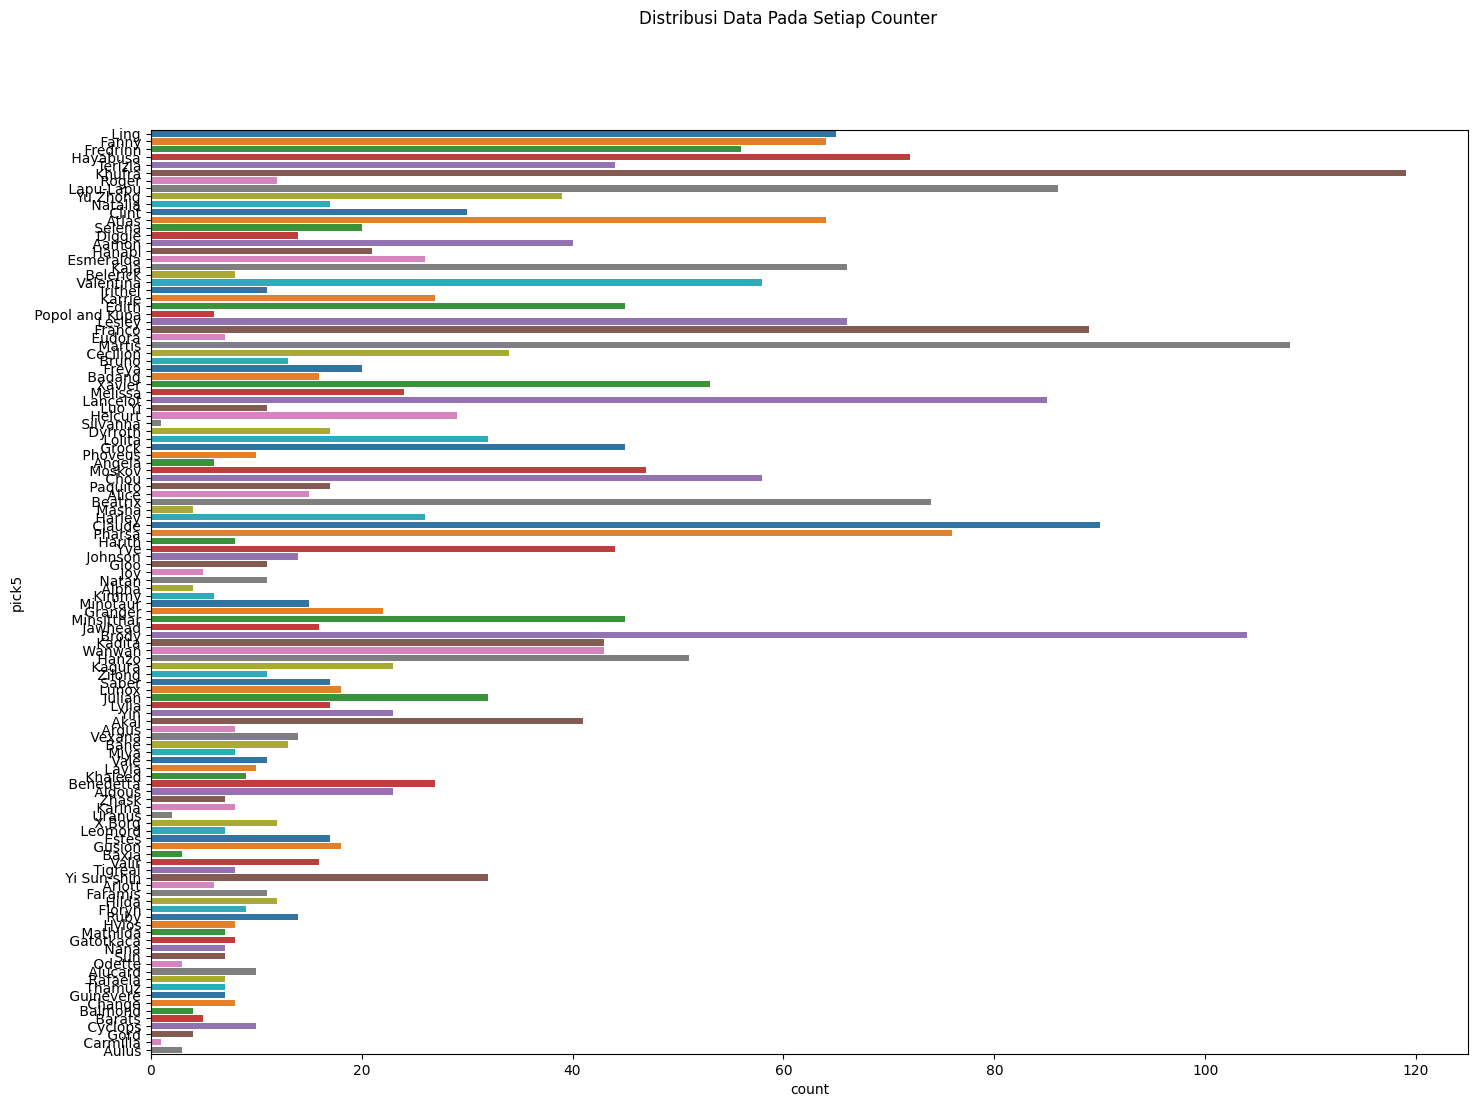

In [181]:
# Distribusi Data Pada Setiap Counter
plt.figure(figsize=(17,12))
sns.countplot(y="pick5",data=data,palette="tab10", dodge=True)
plt.suptitle('Distribusi Data Pada Setiap Counter')
plt.show()

In [186]:
# Pembersihan Teks
def clean_txt(pick5):
    text=pick5.lower()
    text=re.sub(r'[^\w\s]',' ',text)
    text=re.sub(r'[_0-9]',' ',text)
    text=re.sub(r'\s\s+',' ',text)
    return text

# Penerapan Function clean_txt
txt = 'Angela$@#@'
print(clean_txt(txt))

angela 


In [187]:
# Pemisahan Data Latih dan Uji
x_train, x_test, y_train, y_test = train_test_split(data.pick5.values, data.counter_draft.values, test_size=0.1, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2806,), (2806,), (312,), (312,))

In [189]:
# Vektorisasi
x_train = [clean_txt(pick5) for pick5 in tqdm(x_train)]
x_test = [clean_txt(pick5) for pick5 in tqdm(x_test)]

# Tfidf Vectorizer
tfidf = TfidfVectorizer()
tfidf.fit(x_train)

x_train_ready = tfidf.transform(x_train)
x_test_ready = tfidf.transform(x_test)

# x_train_ready,x_test_ready

100%|██████████| 312/312 [00:00<00:00, 119084.80it/s]


In [195]:
# Label Encoding
enc = LabelEncoder()

y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

all_labels = pd.concat([y_train_series, y_test_series])

enc.fit(all_labels)
y_train_ready = enc.transform(y_train)
y_test_ready = enc.transform(y_test)
labels = enc.classes_

# Pengujian Encoder
preds = enc.inverse_transform([0,3,6])
preds

array(['Aamon, Alice, Edith, Wanwan, X.Borg',
       'Aamon, Beatrix, Lapu-Lapu, Alice, Khufra',
       'Aamon, Floryn, Lesley, Julian, Yu Zhong'], dtype=object)

In [196]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(x_train_ready,y_train_ready)

# Pipeline untuk menggabungkan vektorizer dan model terlatih menjadi satu objek
model = Pipeline([('vectorizer',tfidf),('nb',nb)])

In [201]:
# Function untuk melakukan prediksi bahasa dari kalimat teks
def predict(pick5):
    cleaned_text = clean_txt(pick5)
    print(f"Cleaned Text: {cleaned_text}")

    # Assuming model is your trained model and enc is your label encoder
    pred = model.predict([cleaned_text])
    print(f"Raw Predictions: {pred}")

    ans = enc.inverse_transform(pred)
    print(f"Inverse Transformed Predictions: {ans}")

    return ans[0]

example_pick = ['Angela']
result_counter = []

for pick5 in example_pick:
    result_counter.append(predict(pick5))

for counter_draft in result_counter:
    print(counter_draft)

Cleaned Text: angela
Raw Predictions: [2860]
Inverse Transformed Predictions: ['Wanwan, Kadita, Hanzo, Aldous, Johnson']
Wanwan, Kadita, Hanzo, Aldous, Johnson
